# Softmax Regression
- Install Keras from PyPI (recommended):
```
pip install keras==2.1.5```

In [1]:
%matplotlib inline
import keras
print('Keras version : %s' % keras.__version__)

C:\Users\Raisha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras version : 2.2.4


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import model_from_json
from PIL import Image
import pandas as pd
from matplotlib import pyplot

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

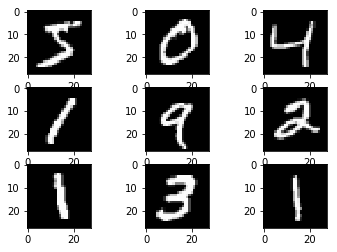

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 9):
    x = 330 + 1 + i
    #print(x)
    pyplot.subplot(x)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
# Logistic regression model
model = Sequential()
model.add(Dense(10, input_shape=(784,), kernel_initializer ='normal', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Train
# > val_loss is the value of cost function for your cross validation data 
#   and loss is the value of cost function for your training data
history = model.fit(X_train, Y_Train, 
                    nb_epoch=nb_epoch, validation_data=(X_test, Y_Test), 
                    batch_size=batch_size, verbose=1)

C:\Users\Raisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.7137 - acc: 0.8277 - val_loss: 0.4487 - val_acc: 0.8865
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4316 - acc: 0.8856 - val_loss: 0.3814 - val_acc: 0.8990
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3855 - acc: 0.8955 - val_loss: 0.3527 - val_acc: 0.9044
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3622 - acc: 0.9008 - val_loss: 0.3364 - val_acc: 0.9081
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3472 - acc: 0.9035 - val_loss: 0.3255 - val_acc: 0.9107
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3366 - acc: 0.9061 - val_loss: 0.3169 - val_acc: 0.9126
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3286 - acc: 0.9084 - val_loss: 0.3118 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


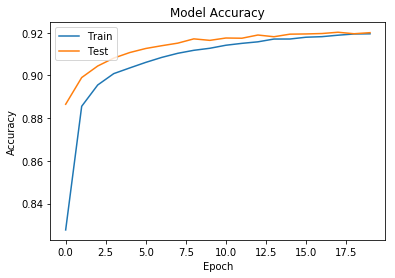

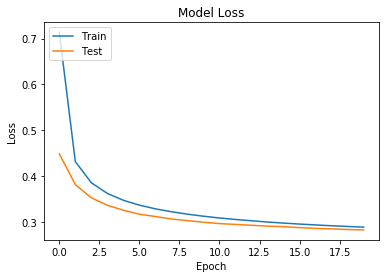

In [17]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 25us/step
Summary: Loss over the test dataset: 0.28, Accuracy: 0.92


In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("./data/04/04_softmax_regression.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./data/04/04_softmax_regression.h5")
#print (model.get_weights())
print("Saved model to disk")

Saved model to disk


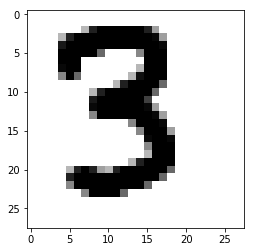

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_load = mpimg.imread('./media/MNIST Test/test3.png')
imgplot = plt.imshow(img_load)

In [21]:
from scipy.misc import imread
import numpy as np

x = imread('./media/MNIST Test/test3.png',mode='L')
#compute a bit-wise inversion so black becomes white and vice versa
print(x.shape)
x = np.invert(x)
x = x.reshape(1,784).astype('float32') / 255

# Example of a train picture
#plt.imshow(X_train[7].reshape(28,28))
#x = X_train[7].reshape(1,784)
#perform the prediction
#model = load_model('02_logistic_regression.h5')
out = model.predict(x)
print(np.argmax(out))

(28, 28)
3


C:\Users\Raisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
